# 6. Numpy

## 6.1 Introduction

## 6.2 The Array

In [1]:
import numpy as np

array1 = np.array([])
array1

array([], dtype=float64)

In [2]:
array1 = np.array([1,2,3])
array2 = np.array([[2,3,4],
                  [5,6,7],
                  [3,0,4]])

In [3]:
array1

array([1, 2, 3])

In [4]:
array2

array([[2, 3, 4],
       [5, 6, 7],
       [3, 0, 4]])

In [5]:
print(array1.shape)
print(array2.shape)

(3,)
(3, 3)


In [6]:
array1.dtype

dtype('int64')

In [7]:
array1 = np.array([1.,2.,3.])
array1.dtype

dtype('float64')

In [8]:
array1.astype(str)

array(['1.0', '2.0', '3.0'], dtype='<U32')

In [9]:
array2.size

9

In [10]:
array2.ndim

2

In [11]:
print(array2)
print(array2.T)

[[2 3 4]
 [5 6 7]
 [3 0 4]]
[[2 5 3]
 [3 6 0]
 [4 7 4]]


In [12]:
array2.flatten()

array([2, 3, 4, 5, 6, 7, 3, 0, 4])

In [13]:
print(array2.argmin())
print(array2.argmax())

7
5


```python 
#에러 예제

array2[7]
```

<img src = "D:/Astronomical Python/Img/chap 6_1.png" width="400" height="400"/>

- 파이썬은 row major 방식 차용 -> axis 0 는 row를 의미

In [14]:
array2.flatten()[array2.argmin()]

np.int64(0)

In [15]:
array3 = np.array([5,6,7,8,9,10,11,12,13,14,15,16]).astype(float).reshape(3,4)
array3

array([[ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.],
       [13., 14., 15., 16.]])

In [16]:
array3.reshape(2,6)

array([[ 5.,  6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15., 16.]])

#에러 예제
```python
array3.reshape(3,3)
```

<img src = "D:/Astronomical Python/Img/chap 6_2.png" width="400" height="400"/>

In [17]:
array3.diagonal()

array([ 5., 10., 15.])

## 6.3 Precision

In [18]:
import numpy as np

print(int(np.float32(123456789)))

123456792


In [19]:
print(int(np.float64(123456789)))

123456789


In [20]:
np.float64(0.0024757564245)

np.float64(0.0024757564245)

In [21]:
np.float32(0.0024757564245)

np.float32(0.0024757565)

In [22]:
np.float64(0.00247575642458884888)

np.float64(0.002475756424588849)

## 6.4 Key Library Functions

## 6.5 Research Example: An Exoplanet Transit

In [23]:
# 원문 코드
"""
import os
import numpy as np
from astropy.io import fits

imlist = []
jd = []

for i in range(1237):
    fn = f'D:/Astronomical Python/BookDatasets/TESS/HAT-P-11/{i}.fits'    
    imlist.append(fits.getdata(fn))
    jd.append(fits.getheader(fn)['btjd'])
    
imlist = np.array(imlist)
jd = np.array(jd)
"""

"\nimport os\nimport numpy as np\nfrom astropy.io import fits\n\nimlist = []\njd = []\n\nfor i in range(1237):\n    fn = f'D:/Astronomical Python/BookDatasets/TESS/HAT-P-11/{i}.fits'    \n    imlist.append(fits.getdata(fn))\n    jd.append(fits.getheader(fn)['btjd'])\n    \nimlist = np.array(imlist)\njd = np.array(jd)\n"

In [24]:
import os
import numpy as np
from astropy.io import fits

base_path = 'D:/Astronomical Python/BookDatasets/TESS/HAT-P-11'
file_list = os.listdir(base_path)

imlist = []
jd = []

for file_name in file_list:
    fn =  os.path.join(base_path, file_name)  
    imlist.append(fits.getdata(fn))
    jd.append(fits.getheader(fn)['btjd'])
    
imlist = np.array(imlist)
jd = np.array(jd)

In [25]:
print(jd)
print(jd.shape)
print(imlist.shape)

[1683.36712646 1683.38800049 1683.57550049 ... 1705.17987061 1705.20068359
 1705.22149658]
(1237,)
(1237, 20, 20)


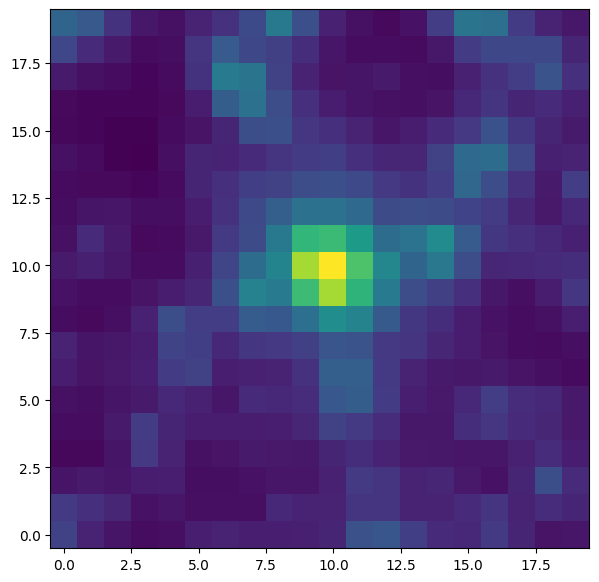

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(np.log10(imlist[0]),origin='lower');

In [27]:
"""
cropped_array = imlist[:, 8:13, 8:13]

l = [1,2,3,4]
np.sum(l)

np.sum(imlist)

np.sum(cropped_array,axis=0).shape

flux = np.sum(cropped_array,axis=(1,2))
flux.shape
"""

'\ncropped_array = imlist[:, 8:13, 8:13]\n\nl = [1,2,3,4]\nnp.sum(l)\n\nnp.sum(imlist)\n\nnp.sum(cropped_array,axis=0).shape\n\nflux = np.sum(cropped_array,axis=(1,2))\nflux.shape\n'

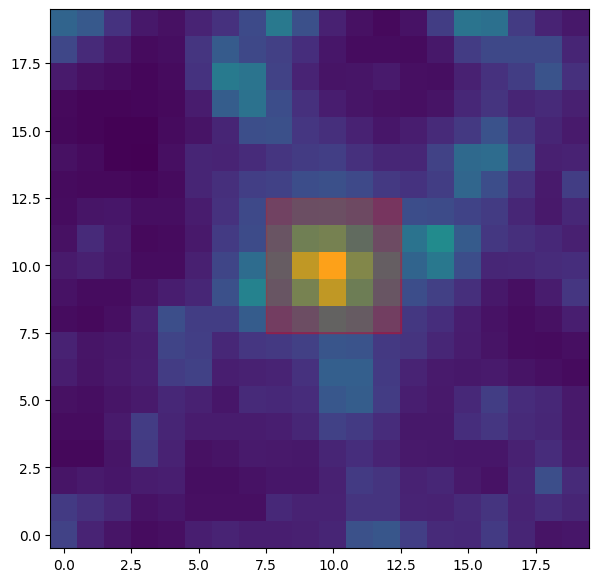

In [28]:
cropped_array = imlist[:, 8:13, 8:13]
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(np.log10(imlist[0]),origin='lower')
ax.fill_between([7.5, 12.5],7.5,12.5,color='r',alpha=0.3);

In [29]:
flux = np.sum(cropped_array,axis=(1,2))
flux.shape

(1237,)

Text(0, 0.5, 'Flux')

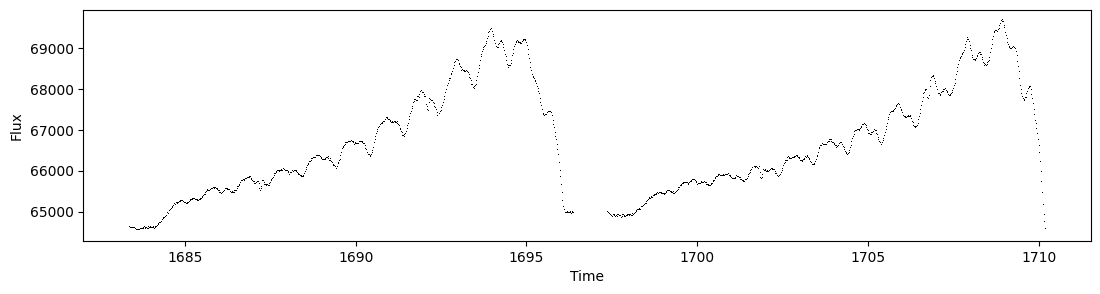

In [30]:
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(jd, flux, 'k,')
ax.set_xlabel('Time')
ax.set_ylabel('Flux')

In [31]:
flux

array([64635.484, 64610.11 , 64547.168, ..., 66992.5  , 66976.52 ,
       66963.9  ], shape=(1237,), dtype=float32)

In [32]:
jd

array([1683.36712646, 1683.38800049, 1683.57550049, ..., 1705.17987061,
       1705.20068359, 1705.22149658], shape=(1237,))

In [33]:
# jd 배열의 차분을 계산
differences = np.diff(jd)

# 모든 차분이 0 또는 양수인지 확인
is_sorted = np.all(differences >= 0)

print("Is the 'jd' array sorted in non-decreasing order? ", is_sorted)

Is the 'jd' array sorted in non-decreasing order?  False


In [34]:
# jd 배열의 정렬된 인덱스를 가져옴
indices = np.argsort(jd)

# jd 배열과 연관된 flux 배열도 같은 인덱스로 정렬
sorted_jd = jd[indices]
sorted_flux = flux[indices]

print("Sorted 'jd' array: ", sorted_jd)
print("Corresponding 'flux' array: ", sorted_flux)

Sorted 'jd' array:  [1683.36712646 1683.38800049 1683.40881348 ... 1710.13824463 1710.15905762
 1710.17987061]
Corresponding 'flux' array:  [64635.484 64610.11  64602.816 ... 64918.758 64737.78  64583.152]


Text(0, 0.5, 'Flux')

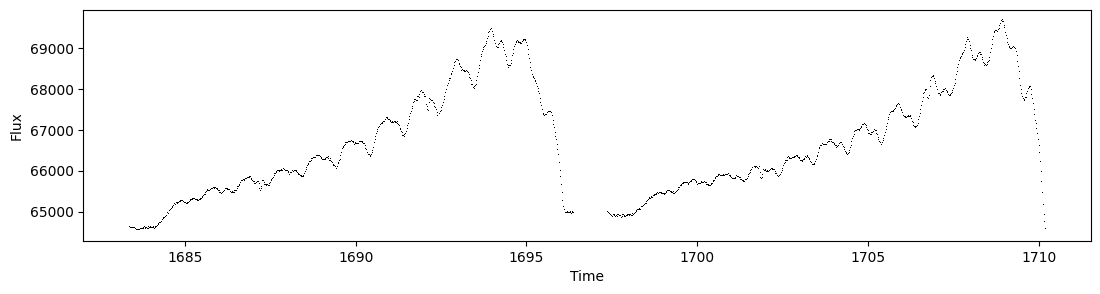

In [35]:
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(sorted_jd, sorted_flux, 'k,')
ax.set_xlabel('Time')
ax.set_ylabel('Flux')

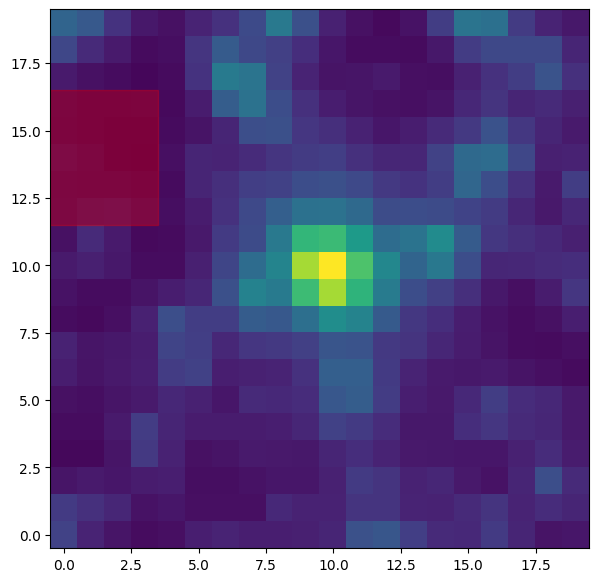

In [36]:
bg = imlist[:,0:4,12:17]
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(np.log10(imlist[0]),origin='lower')
ax.fill_between([-0.5,3.5],11.5,16.5,color='r',alpha=0.3);

Text(0, 0.5, 'Flux (backgrond)')

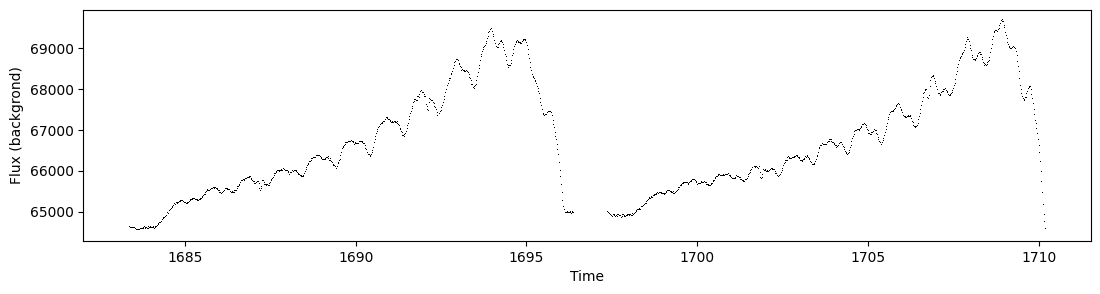

In [37]:
flux_bg = np.sum(bg, axis=(1,2))
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(jd,flux,'k,')
ax.set_xlabel('Time')
ax.set_ylabel('Flux (backgrond)')

In [38]:
mean_bg = np.mean(bg, axis=(1, 2))
flux_minus_bg = flux - mean_bg*cropped_array[0].size

Text(0, 0.5, 'Flux (backgrond subtracted)')

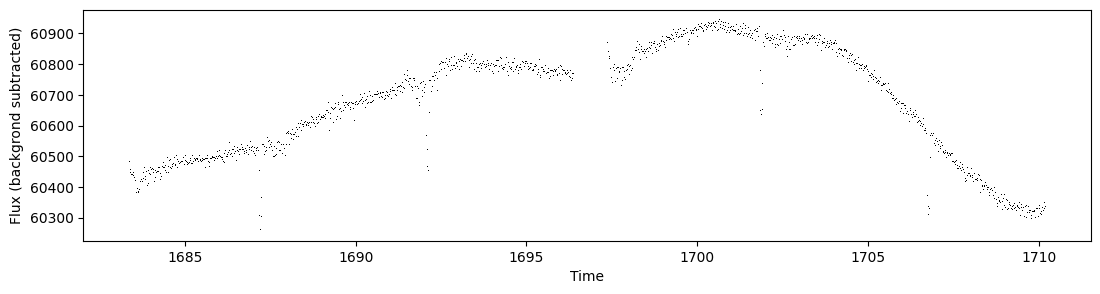

In [39]:
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(jd,flux_minus_bg,',', color='k')
ax.set_xlabel('Time')
ax.set_ylabel('Flux (backgrond subtracted)')

* 데이터 정렬 후 재생성
  

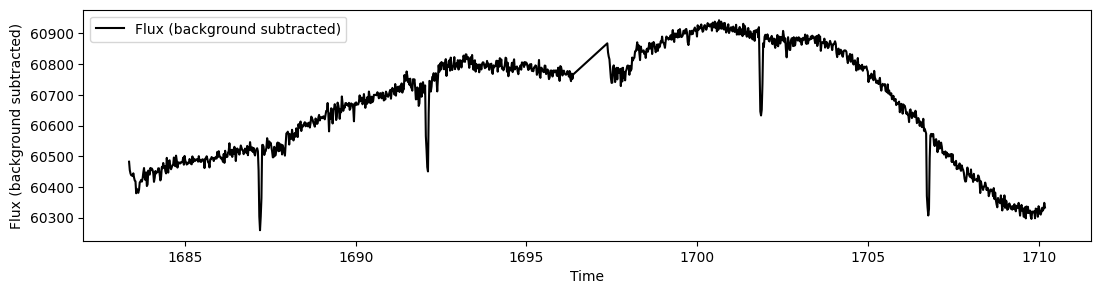

In [40]:
# 정렬된 데이터를 이용한 재생성

# 데이터 정렬
indices = np.argsort(jd)
sorted_jd = jd[indices]
sorted_flux_minus_bg = flux_minus_bg[indices]

# 그래프 생성
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(sorted_jd, sorted_flux_minus_bg, '-k', label='Flux (background subtracted)')  # 선과 점 모두 그리기
ax.set_xlabel('Time')
ax.set_ylabel('Flux (background subtracted)')
ax.legend()

plt.show()


Text(0, 0.5, 'Flux (backgrond subtracted)')

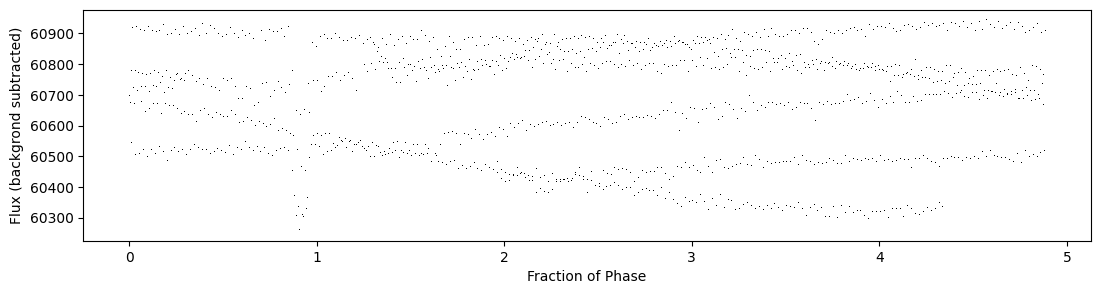

In [41]:
period_days = 4.887802443
folded_time = (jd % period_days)
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(folded_time, flux_minus_bg,',',color='k',ms=1)
ax.set_xlabel('Fraction of Phase')
ax.set_ylabel('Flux (backgrond subtracted)')

- 정렬된 데이터를 이용한 재생성

Text(0, 0.5, 'Flux (backgrond subtracted)')

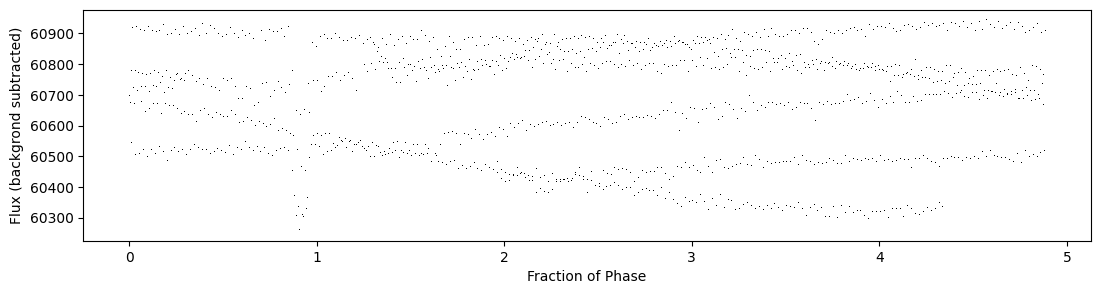

In [42]:
# 정렬된 데이터를 이용한 재생성

period_days = 4.887802443
sorted_folded_time = (sorted_jd % period_days)
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(sorted_folded_time, sorted_flux_minus_bg,',',color='k',ms=1)
ax.set_xlabel('Fraction of Phase')
ax.set_ylabel('Flux (backgrond subtracted)')

Text(0, 0.5, 'Folded Time')

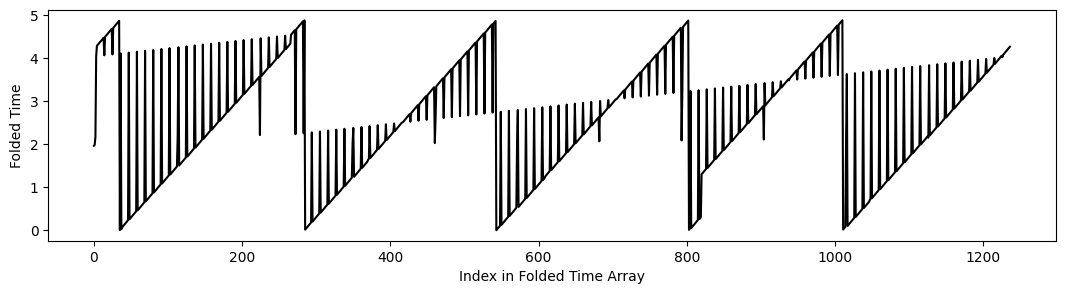

In [43]:
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(folded_time,color='k',ms=1)
ax.set_xlabel('Index in Folded Time Array')
ax.set_ylabel('Folded Time')

- 정렬된 데이터를 이용한 재생성

Text(0, 0.5, 'Folded Time')

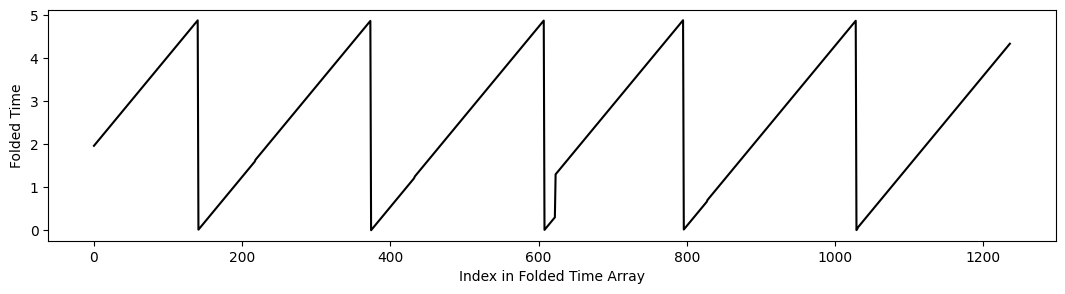

In [44]:
# 정렬된 데이터를 이용한 재생성

fig, ax = plt.subplots(figsize=(13,3))
ax.plot(sorted_folded_time, color='k', ms=1)
ax.set_xlabel('Index in Folded Time Array')
ax.set_ylabel('Folded Time')

Text(0, 0.5, 'Difference from element to element')

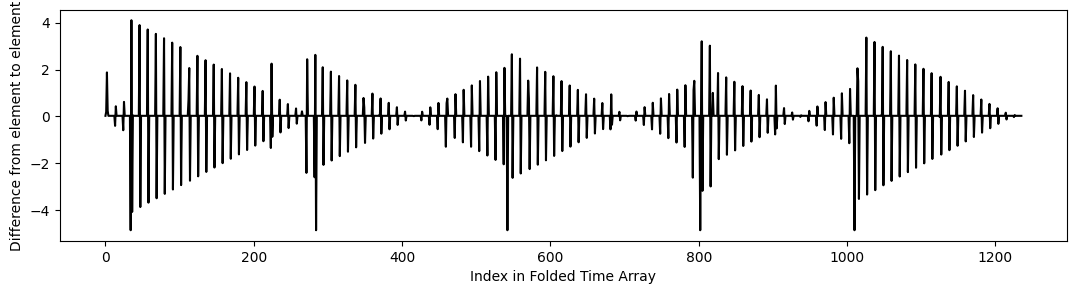

In [45]:
difference_array = folded_time[1:] - folded_time[:-1]
fig, ax = plt.subplots(figsize=(13,3)) 
ax.plot(difference_array, color = 'k', ms = 1)
ax.set_xlabel('Index in Folded Time Array')
ax.set_ylabel('Difference from element to element')

- 데이터 정렬 후 재생성

Text(0, 0.5, 'Difference from element to element')

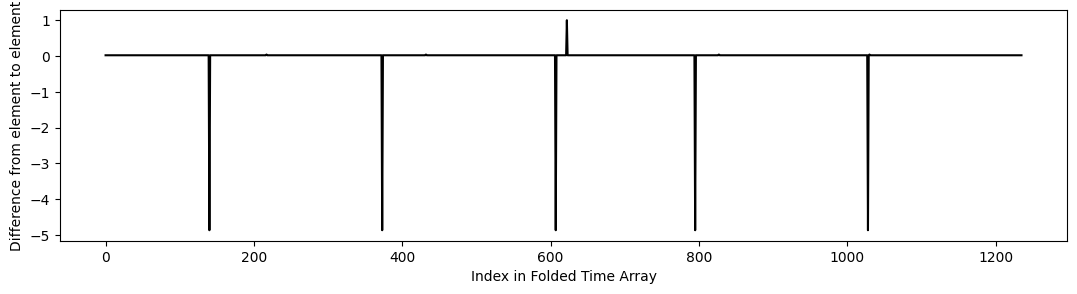

In [46]:
# 정렬된 데이터를 이용한 재생성

sorted_difference_array = sorted_folded_time[1:] - sorted_folded_time[:-1]
fig, ax = plt.subplots(figsize=(13,3)) 
ax.plot(sorted_difference_array, color = 'k', ms = 1)
ax.set_xlabel('Index in Folded Time Array')
ax.set_ylabel('Difference from element to element')

- 정렬된 데이터 사용 시 발생된 에러 문제 해결

In [47]:
ind, = np.where(sorted_difference_array < 0)
ind

array([ 140,  373,  607,  795, 1028])

In [48]:
print(sorted_folded_time[140])
print(sorted_folded_time[141])

4.879834119718751
0.012844665000001143


In [49]:
# 정렬된 데이터를 이용한 재생성

sorted_composite_array = np.array([sorted_folded_time, sorted_flux_minus_bg])
chunk1 = sorted_composite_array[:,:141]
chunk2 = sorted_composite_array[:,141:374]
chunk3 = sorted_composite_array[:,374:608]
chunk4 = sorted_composite_array[:,608:796]
chunk5 = sorted_composite_array[:,796:1029]
chunk6 = sorted_composite_array[:,1029:]

Text(0, 0.5, 'Flux')

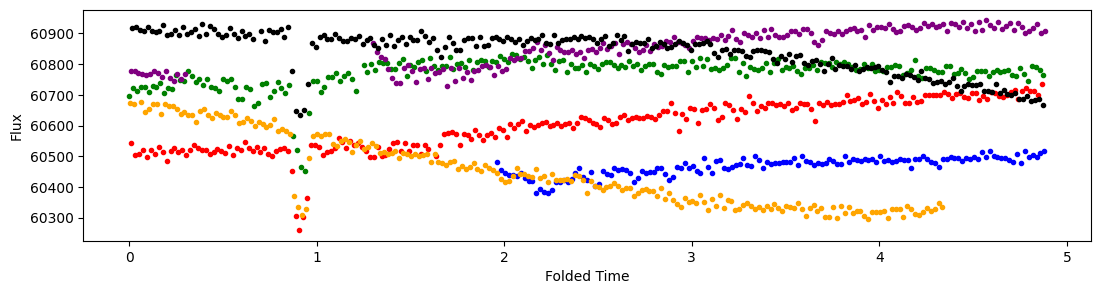

In [50]:
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(chunk1[0],chunk1[1],'.',color='blue')
ax.plot(chunk2[0],chunk2[1],'.',color='red')
ax.plot(chunk3[0],chunk3[1],'.',color='green')
ax.plot(chunk4[0],chunk4[1],'.',color='purple')
ax.plot(chunk5[0],chunk5[1],'.',color='black')
ax.plot(chunk6[0],chunk6[1],'.',color='orange')

ax.set_xlabel('Folded Time')
ax.set_ylabel('Flux')

Text(0, 0.5, 'Flux')

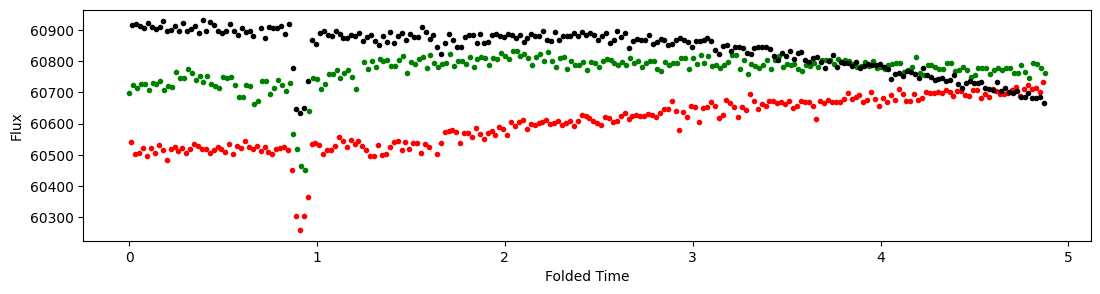

In [51]:
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(chunk2[0],chunk2[1],'.',color='red')
ax.plot(chunk3[0],chunk3[1],'.',color='green')
ax.plot(chunk5[0],chunk5[1],'.',color='black')

ax.set_xlabel('Folded Time')
ax.set_ylabel('Flux')

(0.6, 1.2)

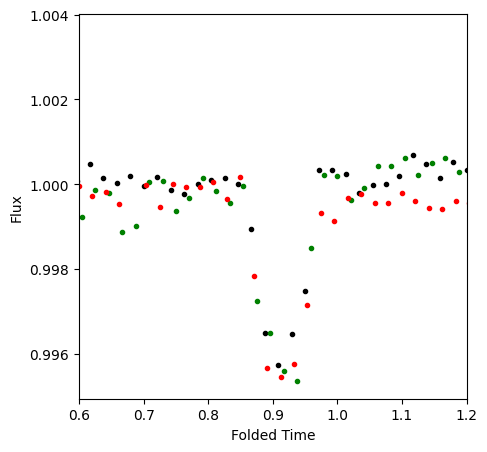

In [52]:
chunk2_norm = chunk2[1] / np.mean(chunk2[1,:20])
chunk3_norm = chunk3[1] / np.mean(chunk3[1,:20])
chunk5_norm = chunk5[1] / np.mean(chunk5[1,:20])

fig,ax = plt.subplots(figsize=(5,5))
ax.plot(chunk2[0], chunk2_norm, '.', color='black')
ax.plot(chunk3[0], chunk3_norm, '.', color='green')
ax.plot(chunk5[0], chunk5_norm, '.', color='red')
ax.set_xlabel('Folded Time')
ax.set_ylabel('Flux')
ax.set_xlim(0.6,1.2)

In [53]:
final_transit_fluxes = np.concatenate([chunk2_norm, chunk3_norm, chunk5_norm])
final_transit_times = np.concatenate([chunk2[0], chunk3[0], chunk5[0]])
final_transit = np.array([final_transit_times, final_transit_fluxes]).T

In [54]:
final_transit

array([[0.01284467, 1.00042091],
       [0.03365765, 0.99979808],
       [0.05453168, 0.99983629],
       ...,
       [4.82880745, 0.99626131],
       [4.84962044, 0.99634275],
       [4.87043343, 0.99601228]], shape=(700, 2))

Text(0, 0.5, 'folded time')

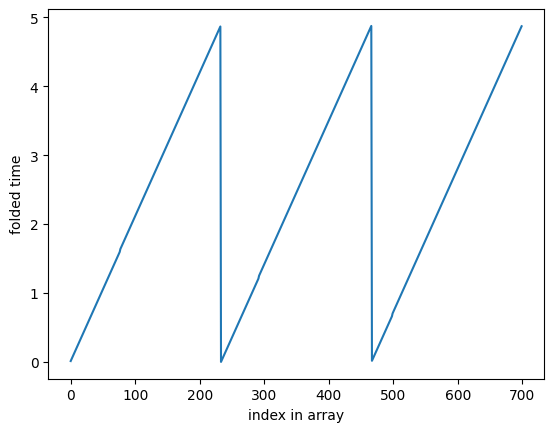

In [55]:
fig,ax=plt.subplots()
ax.plot(final_transit_times)
ax.set_xlabel('index in array')
ax.set_ylabel('folded time')

Text(0, 0.5, 'folded time')

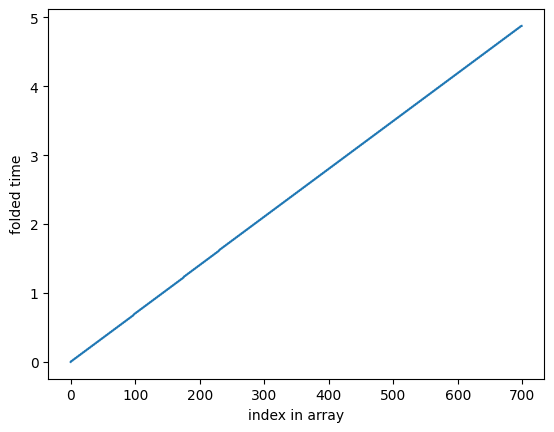

In [56]:
final_transit_sorted = final_transit[final_transit[:,0].argsort()]
fig,ax=plt.subplots()
ax.plot(final_transit_sorted[:,0])
ax.set_xlabel('index in array')
ax.set_ylabel('folded time')

(0.6, 1.5)

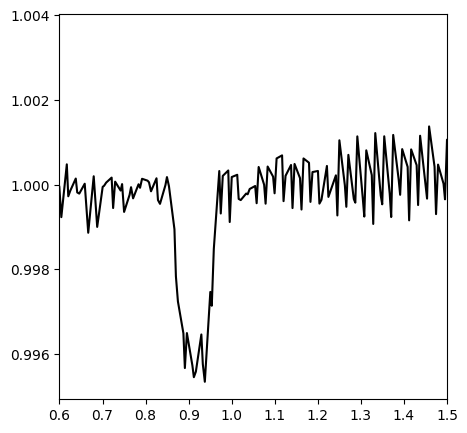

In [57]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(final_transit_sorted[:,0], final_transit_sorted[:,1],color='k')
ax.set_xlim(0.6,1.5)

**그런데 이러한 flux의 감쇠 현상은 검출 오차 아닌가?**

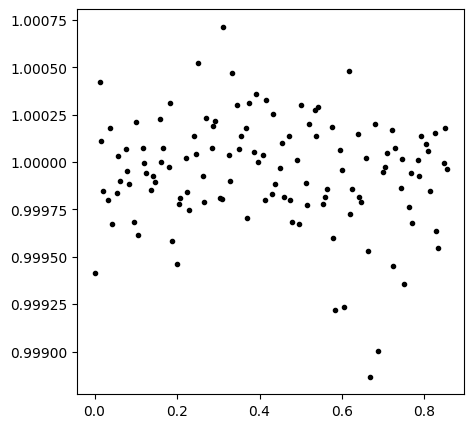

In [58]:
beginning_elements = final_transit_sorted[:123,:]
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(beginning_elements[:,0], beginning_elements[:,1], '.', color='k')

In [59]:
std = np.std(beginning_elements[:,1])
print(f'Noise: {std}')

Noise: 0.00028693376279735226


In [60]:
0.005/std

np.float64(17.425624476026766)

단순한 오차인가? 

아니다. 17$\sigma$ 이상의 차이를 검출한 것이기 때문에 통계적인 오차라는 가설은 기각됨

## 6.6 Summary